In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [88]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [89]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [90]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [92]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [94]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [95]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [96]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [97]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

Мы не можем использовать признак review_date для обучения нашей модели. Выделим из этого признака год и месяц.

In [98]:
# Выделяем из review_date год
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['review_year'] = data['review_date'].str.findall(regex).str.get(0) # применим регулярное выражение
data['review_year'] = data['review_year'].astype('int64') # приведём признак review_year к формату int64

In [99]:
# Выделяем из review_date месяц
data['review_month'] = pd.to_datetime(data['review_date'], dayfirst=True, format='%m/%d/%Y') # приведём признак review_date к формату datetime
data['review_month'] = data['review_month'].dt.month # выделим месяц
data['review_month'] = data['review_month'].astype('int64') # приведём признак review_year к формату int64

Признак days_since_review находится в object. Возьмём из этого признака только числовые значения и приведём его к числовому типу.

In [100]:
# Приводим days_since_review к числовому значению
regex = '\d{1,4}' # регулярное выражение для нахождения чисел
data['days_since_review'] = data['days_since_review'].str.findall(regex).str.get(0) # применим регулярное выражение
data['days_since_review'] = data['days_since_review'].astype('int64') # приведём признак days_since_review к формату int64

Закодируем признак reviewer_nationality (национальность клиента), возможно это поможет в построении модели.

In [101]:
# Кодирование data.['reviewer_nationality']
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

Убираем лишние символы из признака tags, они мешают разбору этого признака на составляющие.

In [102]:
# Убираем из признака tags лишние символы
dat = pd.DataFrame() # создаём датафрейм dat
dat['tags'] = data['tags'].apply(lambda x: (x.replace('[', '').replace(" '", '').replace(']', '').replace("' ", '').replace(" ' ", '').strip().split(','))) # убираем лишние символы из признака tags

Выделяем из признака tags количество ночей проведённых туристом в отеле.

In [103]:
# Выделяем из признака tags количество ночей проведённых туристом в отеле
def night(tag):
    for i in tag: # проходим по списку tag и присваеваем по очереди каждое значение из списка переменной i
        i = i.split(' ') # разбиваем строку из переменной i по пробелам и создаём список i
        for x in i: # проходим по списку i и присваеваем по очереди каждое значение из списка переменной x
            if x == 'night' or x == 'nights': # проверяем есть ли в списке x значение night или nights
                if old == 'the': # на следующем этапе мы возвращаем число находящееся перед словом night или nights, но в одном случае вместо числа попадается the, избавляемся от него
                    return 0 # возвращаем 0
                return old # возвращаем число находящееся перед night или nights
            old = x # число находящееся перед night или nights
    return 0 # возвращаем 0
          
data['nights'] = dat['tags'].apply(night) # применяем функцию night к признаку nights
data['nights'] = data['nights'].astype('int64') # преобразуем признак nights к числовому значению


Выделяем из признака tags тип группы путешествующих.

In [104]:
# функция определения типа группы путешествующих
def group_status(tag):
    for i in tag: # Проходим по списку tag, переданному нам из признака tags построчно
        # Находим нужные нам группы и кодируем их соответствующими цифрами
        if i == ' Couple':
            return 1
        elif i == ' Family with older children':
            return 2
        elif i == ' Family with young children':
            return 3
        elif i == ' Group':
            return 4
        elif i == ' Solo traveler':
            return 5
        elif i == ' Travelers with friends':
            return 6
        elif i == ' With a pet':
            return 7
    return 0

data['group_status'] = dat['tags'].apply(group_status) # применяем функцию group_status к признаку group_status
data['group_status'] = data['group_status'].astype('int64') # преобразуем признак group_status к числовому значению

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Заполняем недостающие значения в признаках lat и lng нулями.

In [106]:
data['lat'] = data['lat'].fillna(0, inplace=True)
data['lng'] = data['lng'].fillna(0, inplace=True)

Смотрим количество уникальных значений в каждом признаке. Это нам поможет при кодировании признаков. Если уникальных значений мало и признак имеет тип object его можно закодировать. Если уникальных значений много кодировать бесполезно.

In [107]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                                1
lng                                                1
sample                                             2
reviewer_score                                    38
review_year                                   

Строим тепловую карту корреляции признаков.

<AxesSubplot:>

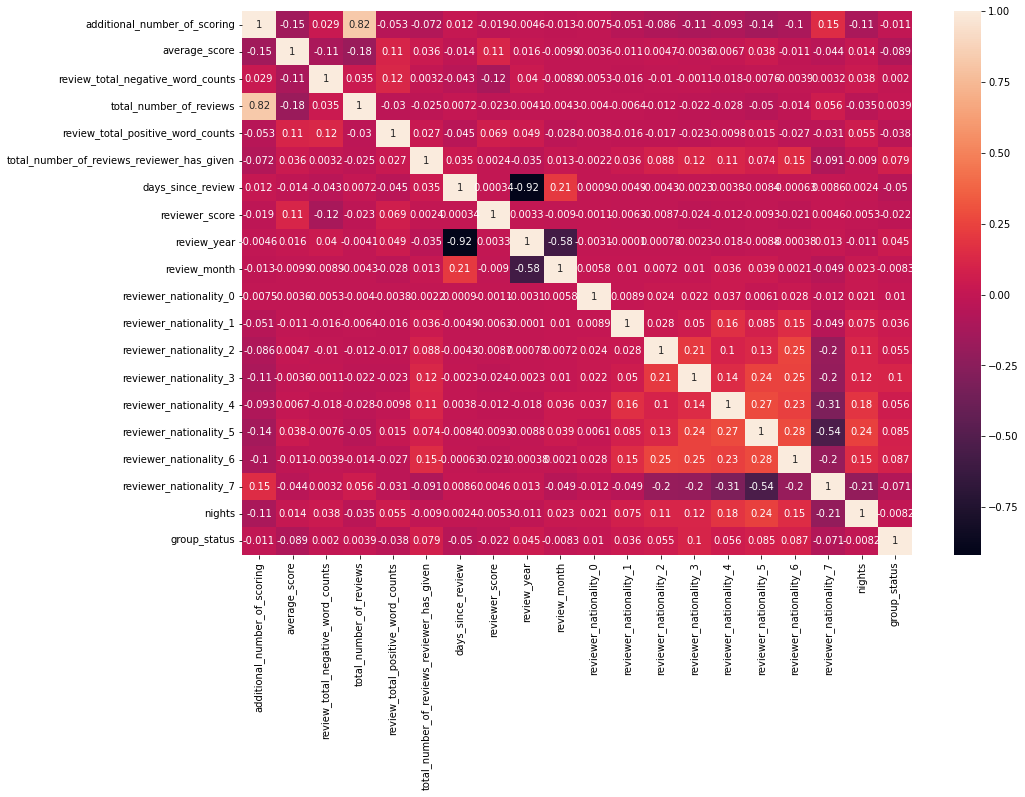

In [108]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

Убираем лишние признаки, на которых модель обучаться не будет.

In [109]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   sample                                      515738 non-null  int64  
 8   reviewer_score                              515738 non-null  float64
 9   review_year                                 515738 non-null  int64  
 

In [111]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [112]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [113]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 20), (386803, 20), (386803, 19), (309442, 19), (77361, 19))

In [114]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [115]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [116]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


In [117]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9419860628063479


<AxesSubplot:>

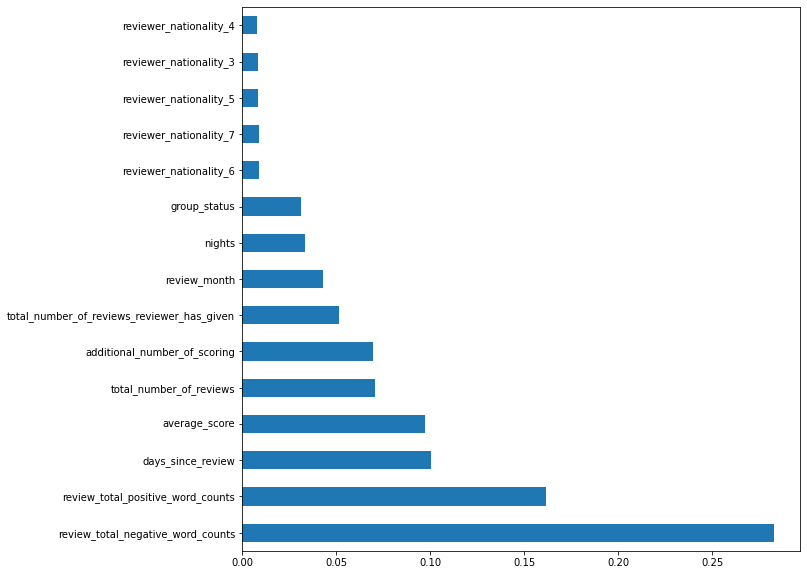

In [118]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [119]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,review_year,review_month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,nights,group_status
24068,102,9.6,0,604,7,6,631,0.0,2015,11,0,0,0,0,0,0,0,1,4,1
80291,279,8.2,13,1140,7,2,255,0.0,2016,11,0,0,0,0,0,0,0,1,1,3
25610,98,8.4,21,970,44,1,359,0.0,2016,8,0,0,0,1,1,1,1,0,4,2
2630,149,8.9,32,623,10,1,548,0.0,2016,2,0,0,0,0,0,0,0,1,1,1
73805,260,8.0,0,3461,8,2,654,0.0,2015,10,0,0,0,0,0,1,1,0,5,5
125143,69,9.0,0,379,18,1,371,0.0,2016,7,0,0,0,0,0,1,0,0,2,1
121261,563,8.3,8,10842,9,4,379,0.0,2016,7,0,0,0,0,1,0,1,1,1,1
65024,93,9.1,2,869,53,2,530,0.0,2016,2,0,0,0,1,0,0,0,1,3,2
82094,512,8.0,16,2491,11,5,95,0.0,2017,4,0,0,0,0,1,0,0,1,2,5
55855,122,8.8,24,1793,20,5,415,0.0,2016,6,0,0,0,1,1,0,0,1,2,4


In [120]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [121]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [122]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.8s finished


In [123]:
predict_submission

array([8.647, 7.283, 7.786, ..., 8.201, 9.546, 7.166])

In [124]:
list(sample_submission)

['reviewer_score', 'id']

In [125]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.647,488440
1,7.283,274649
2,7.786,374688
3,9.604,404352
4,9.792,451596
5,8.808,302161
6,8.288,317079
7,7.712,13963
8,8.546,159785
9,7.812,195089
